In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud

In [6]:
# !pip install wordcloud

In [7]:
df = pd.read_csv("train.csv")
df.shape

(159571, 8)

In [8]:
df.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [9]:
fields = df['comment_text']


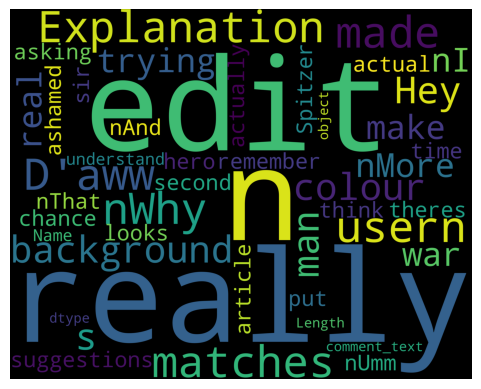

In [10]:
wordcloud = WordCloud(width = 5000, height = 4000, min_font_size = 1).generate(str(fields))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [3]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

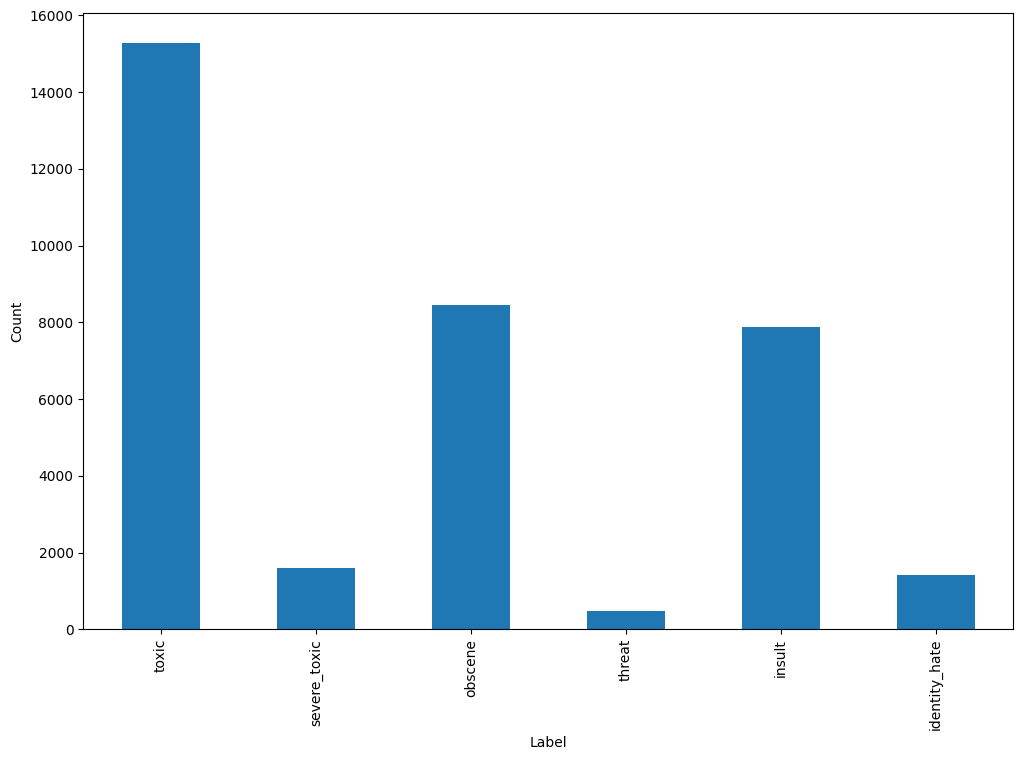

In [4]:
labels = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()
plt.figure(figsize = (12,8))
labels.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [11]:
X = df['comment_text']
y = df['toxic']

In [12]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
vectorizer = CountVectorizer()
model = MultinomialNB()

In [14]:
X_train_vectorized = vectorizer.fit_transform(train_X)


In [26]:
model.fit(X_train_vectorized, train_y)

MultinomialNB()

In [27]:
X_test_vectorized = vectorizer.transform(test_X)
y_pred = model.predict(X_test_vectorized)

In [28]:
report = classification_report(test_y, y_pred)

In [29]:
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     28859
           1       0.77      0.62      0.69      3056

    accuracy                           0.95     31915
   macro avg       0.87      0.80      0.83     31915
weighted avg       0.94      0.95      0.94     31915



In [69]:
def predict(input):
    vectorized = vectorizer.transform([input])
    output = model.predict(vectorized)
    if output == 0:
        print("non-toxic")
    else:
        print("toxic")

In [70]:
predict("This content helped me a lot! Thanks for uploading!")

non-toxic


In [76]:
predict("I will kill you")

toxic


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

2024-05-14 01:55:35.595345: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [67]:
max_features = 20000  
maxlen = 100  
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [68]:
# tokenizer.fit_on_texts(test_X)
# sequences1 = tokenizer.texts_to_sequences(test_X)

In [69]:
data = pad_sequences(sequences, maxlen=maxlen)
# data_test = pad_sequences(sequences1, maxlen=maxlen)

In [70]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
 

In [71]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [72]:
model.fit(data, y, epochs=1, batch_size=32)

4987/4987 [==============================] - 742s 148ms/step - loss: 0.1267 - accuracy: 0.9564


In [85]:
def pred_lstm(text):
    input_sequence = tokenizer.texts_to_sequences([text])


    input_sequence_padded = pad_sequences(input_sequence, maxlen=maxlen)
    predictions = model.predict(input_sequence_padded)
    if predictions[0][0] >= 0.5:
        print("Toxic")
    else:
        print("Non toxic")

In [87]:
pred_lstm("I wanna kill you")

1/1 [==============================] - 0s 33ms/step
Toxic


In [88]:
pred_lstm("way to go!!")

1/1 [==============================] - 0s 33ms/step
Non toxic
